In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [24]:
# load and prepare the data

In [25]:
irisdata = pd.read_csv("C:\\Users\\pranitha\\Desktop\\ASSIGNMENTS\\task 6\\Iris.csv")

In [26]:
irisdata.columns = irisdata.columns.str.strip()

In [27]:
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Encode the target column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
irisdata["Species"] = le.fit_transform(irisdata["Species"])


In [29]:
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [30]:
# Separate features (X) and target (y) variables
X = irisdata.drop("Species", axis=1)
y = irisdata["Species"]

In [32]:
# data standardization

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [36]:
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)




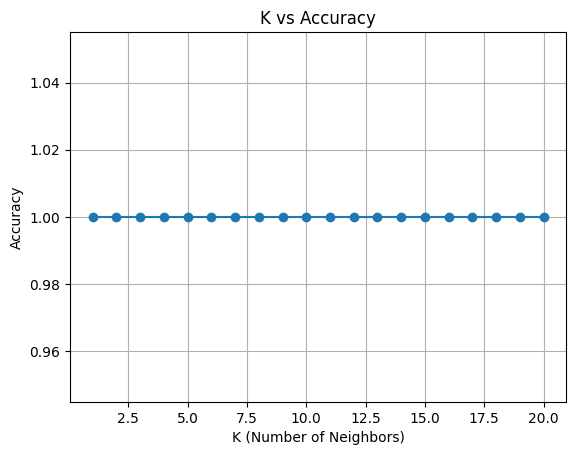

In [37]:
# Plot K vs Accuracy
import matplotlib.pyplot as plt

plt.plot(k_range, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

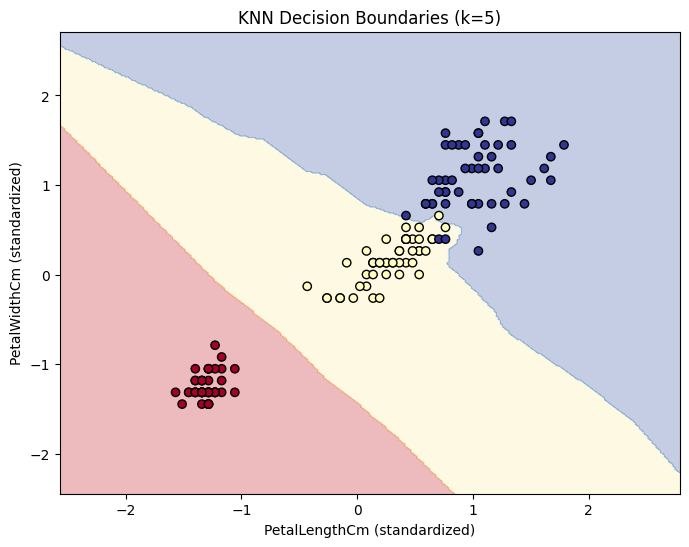

In [38]:
# 1. Select only 2 features for visualization
X_vis = irisdata[["PetalLengthCm", "PetalWidthCm"]].values
y_vis = irisdata["Species"].values

# 2. Standardize features
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# 3. Train-test split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.3, random_state=42)

# 4. Train KNN with best K (you can replace this with your best K value)
best_k = 5
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# 5. Create meshgrid for plotting
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# 6. Predict over mesh
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel("PetalLengthCm (standardized)")
plt.ylabel("PetalWidthCm (standardized)")
plt.title(f"KNN Decision Boundaries (k={best_k})")
plt.show()
